# 1. Environment Setting

In [1]:
# system pakages 
import os
import sys
import re
from time import time
import warnings
warnings.filterwarnings(action='ignore')

# pakages for basic machine learning, linear algebrea, numerical computations, ...
import pandas as pd
import numpy as np
import random #데이터 전처리

from sklearn.feature_extraction.text import TfidfVectorizer # model setting
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split  # model setting
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


import lightgbm

# mics
from tqdm import tqdm

# pakages for visualization
import matplotlib.pyplot as plt
%matplotlib inline


## 전처리 사용자 함수 + 토크나이저
import MeCab
import re

# 2. Data Loading and Processing

## 2-(1). Data Loading

In [2]:
path = "./data/"

In [3]:
train = pd.read_csv(os.path.join(path,'train.csv'), encoding = 'utf-8')
test = pd.read_csv(os.path.join(path,'test.csv'), encoding = 'utf-8')
sample_submission = pd.read_csv(path + '/sample_submission.csv', encoding = 'utf-8')

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
train.loc[random.sample(list(train['index']),3)]

,index,category,data
26373,26373,0,"학교의 규정을 없애주고 학생들을 때리는 선생님들을 처벌해주세요. 안녕하세요 존경하는 문재인대통령님 저는 중학교2학년 입니다 제가학교를다니면서 많은일들이 있었는데 그중 몇몇가지는 정말 억울하게 학교폭력을갔습니다 . 중학교1학년아이가 저를 뒷담화했다는말에 물어보러갔다고 위협을느꼈다며 억울하게 학폭을갔습니다 그리고 또 한 요즘 학생이 아닌 선생님들께서도 학생을때립니다 물병으로 머리를 툭툭치며 멱살을잡고 머리채를잡으며 ' 너네반으로 가 ' 이러십니다 이걸 본 저는 상대방의 기분을생각도 안하며 자기입장만생각하고 그런행동을한다는게 전 솔직히 이해가안갔습니다 화장하는것도 개인적인 취향 , 이런쪽으로 대학교를 갈 수도있는것이고 , 자기만족이라고 생각합니다 또 선생님들은 스타킹이 찢어졌다고 . 올나갔다고 ' 벗어라 ' ' 너넨 그런 행동만 하니? ' ' 너넨 양념치는수준이야 ' ' 더럽다 더러워 ' 욕을하시면서 죽여버린다는 이런 말 과 부모님께선 ' 넌 왜 이런행동만하고다녀 내가 똑바로행동하라했지 '라고 하시면서 맞아가며 제 말은 듣지도 않아서 수업시간까지 빼먹으며 화장실에서 혼자 울었던적이많습니다 . 남자선생님들고 치마 단 박았다 통줄였다 길이짧다 이러시면서 잡으시는데 다리를 계속 보신다는게 쫌 그렇고 그리고 선생님들이 교무실에서 학생처벌 청원을보고계시더군요 .. 물론 이런 일들로 청와대에 왜 청원을 하냐하면 요즘 중학교나 고등학생분들이 이런일을겪고 힘들어하고 억울하고 수치심느끼고 내 취향을 이해못해주는 게 억울하고 그럴꺼같습니다 학생 처벌만 있는다는건 아니라고생각해서 청원해봅니다 처음 해보는거라 많이 긴장되고 말 앞뒤가안맞는부분도있을텐데 그래도 꼭 읽어주시면 좋겠습니다 더 많지만 짧게 말하도록하겠습니다 .. 심각한 얘기가아니지만 저희한텐 그 말 하나하나가 상처가됬습니다 꼭 읽어주셨으면 좋겠습니다 제가 한 말 끝까지읽어주셔서 감사합니다"
1450,1450,2,너무 슬프고 마음이 아프고 눈물이 납니다.. 24개월 2개월된 두 아이를 키우고 있는 아빠 입니다..\n최근 두가지의 어린이집 사건은 정말 일어나서는 안될 일을 이였습니다..너무 마음이 아프고 눈물이 납니다.\n정말 겉으로 보이기식의 시스템이아닌 부모가 항상 아이의 모습을 볼수있게 하여야 합니다.\n어린이집은 사적인 공간이 아닙니다. 교사들의 사적인 공간인 교무실을 제외한 우리 아이들이 생활하는 공간의 cctv는 부모가 항시 볼 수 있게 하여야 합니다..\n늦은시간 뉴스를 보며 마음이 무너질것 같은 마음으로 글을 씁니다..
8060,8060,0,"일베 <이슬람에게 테러 사주> 처벌해라. 국내에 테러내라고 테러리스트에게 사주한 걸 묵과하는 문정부. 적폐청산 타이틀, 이 정도면 장식용이라는 거 확실히 알겠음.\n적폐청산은 느들한테 거슬리는 놈들한테만 이용하는 거 잘 알겠다.\n난민 관련 청원도 무시하고 대답 절대 안 하면서 버티고 있으면서 저런 <국내 태러 사주> 문제까지 언론에서 입 닫고 있는 거 실화냐.\n나라 망치려고 작정했냐.\n당장 수사해라. 테러 사주한 놈, 백퍼 이메일 보내놓고 일 커지니까 보낸 척, 사실은 안 보냈다고 거짓말 하더라. 저 방구석 허언증 일베놈들 왜 수사 안 하고 그대로 두는 거냐.\n적폐청산 느들 입맛대로 하는 거 추잡하다.\n일 좀 똑바로 안하냐?"


In [6]:
test.loc[random.sample(list(test['index']),3)]

,index,data
2758,2758,폐지. 폐지 합시다
1641,1641,교육부장관 사퇴 시켜주세요. 국민세금 20억 들여 1년간 공론화 추진한 결과인 정시 45프로 확대안을 싹 무시하고 학부모 학생들의 의견 무시하는 교육부 장관은 책임지고 사퇴하길 바랍니다\n현 학생부종합의 부정 비리 수시의 폐허 내신의 불신과 부정을 그렇게 외쳐도 귀와 눈닫고 정해놓은 개편안으로 발표해 버린 결과를 받아들일수 없습니다
3974,3974,명예훼손죄 폐지를 청원합니다.. 피해자가 소송이 두려워 피해사실을 알리지 못하고 침묵하게 만드는 갑질의 온상 명예훼손죄 폐지를 청원합니다.


In [7]:
print(train.shape, test.shape)
print(train["category"].value_counts())

(40000, 3) (5000, 2)
2    13362
1    13337
0    13301
Name: category, dtype: int64


## 2-(2). Remove NaN rows

In [8]:
train.loc[train['data'].isnull()]

,index,category,data
2819,2819,0,NaN
3462,3462,1,NaN
20934,20934,2,NaN
22856,22856,2,NaN
26550,26550,2,NaN
28546,28546,2,NaN
31400,31400,1,NaN
36070,36070,0,NaN


In [9]:
train = train.dropna(how = 'any').reset_index(drop=True) # 결측치 포함 행 제거
train.shape

(39992, 3)

## 2-(3). Preprocessing

### Replace same meaning words

In [10]:
words_replacement_dict = {
    '문재인' : '대통령', '대통령님' : '대통령',
    '이 나라': '한국', '대한 민국' : '한국', '대한민국' : '한국', '우리 나라' : '한국', '우리나라' : '한국',
    '본 게시물의 일부 내용이 국민 청원 요건에 위배되어 관리자에 의해 수정되었습니다' : '**'
}

In [11]:
def replace_words(sentence):
    global words_replacement_dict
    
    for key, value in words_replacement_dict.items():
        sentence = sentence.replace(key, value)
    return sentence

In [12]:
def apply_replacement(src_df, replace_func):
    ret_df = src_df
    ret_df['data'] = ret_df['data'].apply(lambda x: replace_func(x))
    return ret_df

### 불용어 목록

In [13]:
stopwords = ['습니다', '으로', '에서', '합니다', '입니다', '세요', '생각', '에게', '다고', '라고', '지만','는데', '라는', '까지', '해야', '의', '가', '이', '은', '는', '들', '좀', '잘', '걍', '과', '도', '를', '한', '자', '에', '와', '하다', '을', '를', '있', '없','아니', '이런', '으면', '대한', '해서', '너무', '다는', '도록', '면서', '그리고', '됩니다', '대통령', '한국', '청원', '국민']

### MeCab 형태소 분석기

In [14]:
mecab = MeCab.Tagger()

def mecab_morphs(text):
    morphs = []
    
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile(".*\t[A-Z]+") 
    
    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    temp = [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]]
        
    # 추출한 token중에 문자열만 선택.
    
    for token in temp:
        morphs.append(token[0])
    
    #return temp
    return morphs

### 최종 전처리 함수

In [15]:
def preprocessing(df):
    processed = []
    ## 완벽한 한글 글자를 제외한 나머지 (단자음 단모음 및 특수문자, 영어 등) 제외
    df['data'] = df['data'].str.replace("[^가-힣]"," ")
    ## 같은 뜻 단어들 대체
    df = apply_replacement(df, replace_words)
    
    for sentence,i in zip(df['data'],tqdm(range(len(df['data'])))) :
        temp_X = []
        temp_X = mecab_morphs(sentence)
        temp_X = [word for word in temp_X if not word in stopwords]
        processed.append(" ".join(temp_X))
    return processed

In [16]:
X_train = preprocessing(train)
X_train[0]

100%|█████████████████████████████████████████████████████████████████████████▉| 39991/39992 [00:29<00:00, 1341.95it/s]


'신혼 부부 위한 주택 정책 보다 보육 시설 늘려 주 세금 일부 위한 정책 펴 지 마시 고 보편 적 모든 수긍 할 수 복지 정책 펴 주 시 길 바랍니다 저 신혼 부부 당첨 되 사람 로또 되 주택 정책 반대 세금 일부 사람 퍼 주 기 식 되 면 안 되 죠 그 세금 우리 아이 안 전하 게 맡길 수 보육 시설 전국 설치 해 주 대 기업 솔선수범 모든 사업장 의무 설치 할 수 하 시 구요 집 보다 애 맡길 데 어 경력 단절 되 게 더 괴롭 집 개인 능력 키워 사 게 맞 그 능력 키울 수 육아 전담 힘 기울이 게 맞 우리 아이 부모 키우 거 맞 이제 국가 책임지 시대 로 게 맞 봅니다 그렇 잖아도 부동산 가격 자꾸 올라가 게 정부 정책 잘못 되 었 봅니다 부동산 그냥 내버려 두 건들 수록 역효과 네요'

In [17]:
X_test = preprocessing(test)
X_test[0]

100%|███████████████████████████████████████████████████████████████████████████▉| 4999/5000 [00:03<00:00, 1345.68it/s]


'소년법 폐지 해 주 법 아래 보호 받 아야 할 아이 법 인해 보호 받 지 못하 고 오히려 법 악용 하 사례 만 늘어나 고 그 강도 높 아 지 고 소년법 폐지 부탁드립니다'

## 3. Vectorize with TF-IDF

In [18]:
vectorizer = TfidfVectorizer(
    ngram_range=(1, 3),
    min_df=2,   
    max_features=25000,
    sublinear_tf=True, # 1+log(tf) tf의 영향을 줄여주기위해
    lowercase=False,
    use_idf=True)

In [19]:
%%time
vec_x_train= vectorizer.fit_transform(X_train)
vec_x_test= vectorizer.transform(X_test)

Wall time: 30.9 s


In [20]:
t_vocab = vectorizer.get_feature_names()
print(len(t_vocab))
t_vocab[:10] #columns(unigram~trigram)이 형성됨

25000


['가게', '가격', '가격 인상', '가격 인하', '가결', '가계', '가공', '가관', '가구', '가까운']

In [21]:
# numeric한 표현
pd.DataFrame(vec_x_train[:10].toarray(), columns=t_vocab).head()

,가게,가격,가격 인상,가격 인하,가결,가계,가공,가관,가구,가까운,...,힘들 정도,힘들 집니다,힘들 학교,힘들 학생,힘듭니다,힘써,힘써야,힘쓰,힘없,힘입
0,0.0,0.089061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.076465,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [22]:
# 위에서 구한 단어벡터를 더하면 단어가 전체에서 등장하는 횟수를 vectorized feature로 알 수 있음
# Bag of words 에 몇 개의 단어가 들어있는지 확인하니 골고루 잘 들어있는 것을 볼 수 있음
t_dist = np.sum(vec_x_train, axis=0)
t_df_freq = pd.DataFrame(t_dist, columns=t_vocab)
t_df_freq

,가게,가격,가격 인상,가격 인하,가결,가계,가공,가관,가구,가까운,...,힘들 정도,힘들 집니다,힘들 학교,힘들 학생,힘듭니다,힘써,힘써야,힘쓰,힘없,힘입
0,16.000066,53.214038,3.323381,4.036707,2.010645,7.836891,2.276614,12.746381,17.230544,31.035592,...,6.336275,3.584769,3.038057,3.53432,48.869194,20.649719,2.275424,11.2394,25.266858,3.284977


In [23]:
# numeric하게 바꾸어도 가중치를 맥인 상위 단어들 분포는 그래도 조금 치우쳐져 있음
# XXX, 고객, 은행 등의 단어를 조금 떨어트려서 휴리스틱하게 성능을 올리는 방향으로 전략을 세우게됨
t_df_freq.T.sort_values(by=0, ascending=False).head(60)

,0
폐지,666.010533
사람,601.477040
아이,587.244400
청소년,536.582035
선수,494.917797
학교,491.201661
처벌,482.579471
학생,457.498608
국가,436.072554
교육,426.391718


In [24]:
y_train = [y for y in train['category']]

## 4. Generate and Train model

### (1) Linear Support Vector Classifier with CalibratedClassifierCV

In [28]:
# Scaled: 좋지 않은 생각
#clf = make_pipeline(StandardScaler(with_mean=False), LinearSVC(random_state=42, class_weight = 'balanced'))

# general
clf = LinearSVC(C = 0.16, random_state=42, class_weight = 'balanced')
clf.fit(vec_x_train, y_train)

LinearSVC(C=0.16, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [30]:
cross_val_score(clf, vec_x_train, y_train, cv=3)

array([0.87937889, 0.87817868, 0.88192048])

In [31]:
%%time
#y_pred = cross_val_predict(clf, vec_x_train, y_train, cv=StratifiedKFold())
model = clf.fit(vec_x_train, y_train)
y_pred = model.predict(vec_x_train)

Wall time: 595 ms


In [32]:
print(accuracy_score(y_train, y_pred))

0.9256101220244048


In [33]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_svc = CalibratedClassifierCV(base_estimator = clf, cv = 'prefit')
calibrated_svc.fit(vec_x_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.16, class_weight='balanced',
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=42, tol=0.0001,
                                                verbose=0),
                       cv='prefit', method='sigmoid')

In [34]:
train_predicted = calibrated_svc.predict(vec_x_train)

In [184]:
print(accuracy_score(y_train, train_predicted))

0.9261352270454091


In [185]:
predicted = calibrated_svc.predict(vec_x_test)
predicted

array([0, 2, 1, ..., 1, 0, 2])

In [186]:
sample_submission['category'] = predicted
sample_submission.to_csv('./results/tf-idf_svcc0.16_enhanced_replaced_sw_25kvocab_cali.csv', encoding='utf-8', index = False)

In [187]:
sota = pd.read_csv(os.path.join('./results/tf-idf_svcc0.1_enhanced_replaced_sw_25kvocab_cali.csv'), encoding = 'utf-8')

In [188]:
cmp = pd.concat([pd.DataFrame(test),pd.DataFrame(predicted), sota['category']], axis=1).tail(60)
cmp

,index,data,0,category
4940,4940,프로야구 심판 주심 의 스트라익존을 지킵시다 어제 한화 경기를 보면서 느끼는 점은 주심의 스트라익 존이 무지하게 좁아 보였다는 점이 팩트입니다 주목할 만한점은 샘슨 안영명 송은범선수등 한화의 투구는 정확히 스트라익존을 누가봐도 통과한 것으로 보였는데도 볼이고 상대팀은 더넓은 스트존을 형성한다는 사실이 유난히 돋보인 믿지못할 경기가 나왔다는 현실을 봐서 다시한 번 공정한 스트라익존의 일관성을 촉구하는 바입니다 투수들의 스트존의 불만을 표현의 한계성을 침범할 수 없다는 현실이 이런사태를 키우는게 아닌지 야구팬의 입장에선 답답한 마음을 갖지 않을수가 없습니다 이런 눈으로 보고도 당할 수 밖에 없는 선수들 팬들의 공분을 과연 에서는 그냥 간과하고 넘어갈 수 있는지 생각할수록 프로야구의 한계성에 경악을 금치못하며 당사자의 자발적 양심선언을 촉구하는 바입니다 끝으로 현대문명의 기계화가 빠르게 도입되는 시점이고 야구에서도 조속한 기계화 자동화를 신속히 도입하여 이런 불공정판정이 없도록 컴퓨터주심 스트락익 판정 도입을 하루속히 실무도입이 이뤄지기를 바랍니다 심판 주심 의 월간 투명성 공정성 인기도 투표제를 익월초 야구팬들을 대상으로 에서 도입을 적극 추진 했으면 합니다,1,1
4941,4941,국가보훈처는 인권탄압인 위치정보제공을 폐지하라 국가보훈처는 섬김이의 인권침해와 갑질과 대상자 성희롱을 조사하라,0,0
4942,4942,한국 사법부 해체를요구합니다 헌법제 조 항 모든 국민은 법앞에 평등하다 누구든지 성별 종교 사회적계층으로 차별받지아니하여야한다 에이즈보균자 여성 가 감염사실숨기고 합의성관계를유도한 무죄 낙태태아를 택배로 보낸 여성 무죄 층간소음으로 윗집남성을 칼로 번찌른 남성 살인미수로인한 징역 년형 편의점 직원이 남자라는 이유로 싫다고 식칼로 번찌른 여성 벌금 만 이게 나라입니까 이러니 사법부를 불신하는것입니다 한국의 사법부가 헌법자체를지키지도 않는데 사법부의역할을 온전히 할수있습니까,0,0
4943,4943,결혼시 양가 불평등 호칭 아가씨 도련님 처형 처제 청원 시가 친가의 불평등 호칭 아가씨 도련님 처형 처제 의 수정을 촉구합니다 시가는 아가씨 도련님등 조선시대 종들이 쓰던 말을 여성에게 쓰게 함으로써 자연스럽게 하대문화가 만들어집니다 그러나 외가는 밖 외자를 쓰면서 처형 처제등 호칭에 반말이 자연습니다 이는 성별간의 갈등을 더욱 조장하고 젊은 여성들을 중심으로 결혼문화에 회의감을 느끼게 하는데 일조합니다 여성과 남성 양가의 호칭문제 통일을 촉구합니다 이미 지난 일이십년간 여성단체에서 건의해왔던 문제이고 청와대 국민신문고와 국립국어원에도 건의한 적이 있으나 시기상조라고 일축하였습니다 사실 바뀔 시기는 지나도 이미 한참 지난것 같습니다 다시한번 여성과 남성 양쪽 집안의 호칭문제를 통일할것을 청원합니다,0,0
4944,4944,김보름 박지우 선수 출전정지 빙상연맹 적폐청산 김보릉 박지우 퇴출 빙상연맹 적폐청산이 반드시 필요합니다,1,1
4945,4945,여자 단일팀 하키 반대 청원합니다 안녕하십니까 국민의 한사람으로써 평창올림픽 여자하키 단일팀 진행에 반대합니다 년동안 그들만의 리그가아닌 어려움끝에 태극마크를 달고 국가를 위해서 얼마나 뛰고싶었었을까요 그들의 땀방울이 정치적목적으로 이용되서는 안된다고 봅니다 선수들 국민의 목소리에 귀귀울려주셧으면 합니다 포항지진때 수능연기때 하셧던 말씀이 생각납니다 전체 수능 수험생의 도 안되는 명의 학생의 안전과 공정함이 더 중요하다 생각했다 소수를 위한 정책을 실현하겠다 하셧습니다 사람들의 울림을 주셧는데 왜 구지 비인기종목인 여자아이스하키 설움을 격음으로써 년동안 준비해서 그들의 힘으로써 진출했고 매달권 접근을 못한다는 총리님의 발언과 정치적인목적으로 이모든게 결정된다면 스포츠에 정치가 잇다라고햇던 북한 의 이야기에 머가 다를바가 있나싶으며 분개합니다 북한은 민족이지만 주적이라 생각합니다 한국은 아직작은나라지만 큰나라를 바랍니다,1,1
4946,4946,양육비 양육비를 제대로 보내지 않는 사람에게는 정부에서 더 강력한 조치가 있기를 바랍니다 간절한 마음으로 청원 합니다 대통령께서 꼭 헤아려주시기를 기대합니다 할머니로써 모든걸 포기하고 아기만 양육하고 있는데 정말 너무 답답해서 두서없이 올려봅니다 수고하세요,2,2
4947,4947,인천광역시 동구 동인천 퀴어축제반대 인천에서 열리는 퀴어축제에대해서 말할려고합니다 지금 인천에서 성소수자가 자기도원하는걸해달라고 요청하는거같은데 왜 인천에와서 그런짓이나하고 그럼니까 또한 인천은 어디입니까 교회가 처음시작된곳인데 절대로 일을 크게할려고합니까 청와대와 대통령은 이일을앎면서도 모르는척하는겁니까 절대로 이일을보고만있을갑니까 제발 정신차리세요 제발 그리고 일이크게벌어지면 이일은 다 현 박남춘 인천시장과 인천 현 허인환 동구청청장과 청와대 더불어민주당과 대통령의잘못입니다 그러니 정부는 인천 동구 동인천에서 열리는 퀴어축제를 즉각중단을요청합니다 어린애들이 그걸배울까두렵습니다 제발,1,1
4948,4948,네티즌 여러분 양승태 판사를 어떡 하면 좋을까요 양승태 판사를 어덕게 하면 가장 좋을가요,0,0
4949,4949,벤투 감독을 경질해주세요 벤투 감독을 경질해주세요 능력이 없고 시간낭비이고 월드컵을 이런식으로 할수는 없습니다 기회비용 측면에서 지금 경질하는게 년후 한국축구를 위해서 예방주사입니다 축구는 단순히 축구로 그치는게 아니라 한나라의 국격과 경제와 연관이 깊습니다 미련은 버리고 적폐청산해주세요 선수기용에 실망이고 선의의 경쟁이 없다보니 열정도 없습니다,1,1


In [189]:
cmp.loc[cmp[0]!=cmp['category']]

,index,data,0,category


In [190]:
conf_mx = confusion_matrix(y_train, y_pred)
conf_mx

array([[12223,   496,   580],
       [  473, 12732,   130],
       [ 1096,   200, 12062]], dtype=int64)

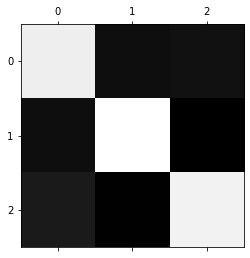

In [45]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

### (2) Light Gradient Boosting Machine

In [25]:
d_train=lightgbm.Dataset(vec_x_train, label=y_train)

In [49]:
lgbm = lightgbm.LGBMClassifier(n_estimators=381,
                     learning_rate=0.035,
                     max_depth=7,
                     objective='multiclass',
                     class_weight='balanced',
                     # reg_lambda=0.3,
                     min_child_samples=48,
                     random_state=4321)

Wall time: 0 ns


In [50]:
%%time
lgbm.fit(vec_x_train, y_train, eval_metric = 'logloss')

Wall time: 1min 20s


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split',
               learning_rate=0.035, max_depth=7, min_child_samples=48,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=381,
               n_jobs=-1, num_leaves=31, objective='multiclass',
               random_state=4321, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:
y_train_pred_1 = lgbm.predict_proba(vec_x_train)
y_train_pred_1 = [np.argmax(line) for line in y_train_pred_1]

print(accuracy_score(y_train, y_train_pred_1))

0.8763502700540108


In [52]:
cross_val_score(lgbm, vec_x_train, y_train, cv=3)

array([0.8508739 , 0.85004876, 0.85468867])

In [56]:
%%time
y_test_pred = lgbm.predict_proba(vec_x_test)
y_test_pred = [np.argmax(line) for line in y_test_pred]

Wall time: 68 ms


In [57]:
pd.concat([pd.DataFrame(test['data']),pd.DataFrame(y_test_pred)], axis=1).head(30)

,data,0
0,소년법 폐지해주세요 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하고 있습니다 오히려 법을 악용하는 사례만 늘어나고 그 강도는 높아지고 있습니다 소년법폐지를 부탁드립니다,2
1,국공립 유치원 증설에 관하여 국공립 유치원 부지 학보와건립및 증설에 지역 어린이 놀이터 부지와 지역의 방대한 주민센터휴계부지 및 구청 시청 군청 청사공간부지 활용과 청년실업과 퇴직희망자가 재교육을 통해 유아 유치 업무에 종사하는 방법은 불가능한 건가요,2
2,나경원파면 나경원의원의 동계올림픽 위원을 파면해 주세요,1
3,국민위원에가 삼성편만들어요 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이 많아요 그래서 산업 제외을 받기 위해서 환경 평가표을 받아야 합니다 그래야 신청 할 수 있습니다 법원에서도 평가표을 공개하라고 판결이 나지만 국가 국민위원에가 공개을 하지 못하겠 하고 있어요 삼성이 환경평간표가 산업 기밀 이라고 다시 막았어요 단 하루만에 피해자들은 년동안 고통을 받고 있는데 제발 국민위원에가 국민을 위해 일해주세요 그리고 국민위원에서 독단으로 처리한 분도 다시 감독 해주세요,0
4,방과후 유치원 어린이집 영어교육을 유지시켜주세요 저는 아이 셋 키우는 평범한 주부입니다 학교 방과후나 어린이집에서 받는 영어교육은 과하지않은 도움되는 교육이라 좋은점을 많이 느끼고 있는데 이렇게 없앤다고 하니 막막한 생각이 듭니다 학원을 보내기쉽지않은 경제상태인데 많은 시간을 배정받은 것도 아닌데 저처럼 도움받는 분들이 더욱 많은것으로 알고있는데 상황도 모르고 높은분들은 그저 토론 후 없애버리고있습니다 영어를 쉽게 놀이처럼 받아들이며 배우는 작은 지역에서의 영어교육은 서울 수도권처럼 과하지않습니다 영어유치원 원어민 선생님과 공부하는것도 아니고 소규모지역 부모들은 이 작은 교육도 지금 받지 못하게 됐어요 서울 수도권 영어교육은 규제해야될 정도로 과열되었을지 모르나 지역은 그렇지않습니다 수업일수도 여기는 부족하다싶은데 어디를 기준으로 이것이 시행되는지 모르겠습니다 무조건 없애고 줄인다는건 답이 없습니다 부디 한번더 두번더 생각하셔서 영어교육이 유지될수있도록 해주십시오,2
5,유은혜는 당장 사퇴하라 능력도 전문성도 없는 사람이 국회의윈 그리고 대통령의 친분으로 인해 사회 교육부총리라는 중요한 자리에 낙하산으로 내정된 것은 적폐가 아나고 무엇이냐 부총리 자리의 경중도 모르고 총선 출마에 대한 확고한 인식도 없는 인간이 무슨 부총리냐 정부와 내각은 총 사퇴하라 정부는 제발 정신 좀 차리고 나라 살림 경제에 제발 신경 좀 써라 남북관계는 이 정부 아니어도 언젠가는 좋아지고 통일은 아직도 먼 얘기이며 칼자루는 우리가 아닌 미국이 갖고 있지 않는가 정신들 좀 차리고 살라 국민들이 얼마나 힘든지 너희들은 아는가 각성하라,2
6,신태용 감독 노벨상 수상 청원합니다 한국축구가 가장어려운 시기에 용기있기 감독을 맡아서 강 진출보다 더 값진 독일전 승리의 신화를 이룬 신태용 국가대표 감독에게 감사의 표시로 노벨상 수상을 청원합니다,1
7,사회복무요원 최저임금 보장 사회복무요원들은 의식주 보장이 아무것도 되질 않는데 왜 최저임금을 보장해주지 않는거죠 일 쉽게 한다고 배부른소리라고 할게 아니라 지킬건 지켜야 한다고 생각합니다,1
8,로또복권 의구심 로또복귄 운영에 대한 민초들의 의구심을 해소하기 위하여 추첨은 생방송으로 진행하는것이 지극히 타당하다고 봅니다 하루속히 녹화방송을 생방송으로 바꿔주실것을 청윈 합니다,1
9,다자녀의기준이 뭘까요 오늘 상수도사업본부 감면신청을 보고 당황스러웠습니다 세이하의 자녀 명이상이 신청대상이라네요 저희는 살 명 세 명 세 명 즉 명의 자녀를 둔 학부모입니다 지금 이 시대를 살아가는 대가족의 한가정의로 안타까운 심정입니다 지방자치단체에서 다자녀혜택은 물론이고 올해로 대학생자녀가 명이 되지만 한국장학재단의 다자녀혜택을 보지못하고 있습니다 무엇이든지 행정이 정한 규칙이겠지만 지금 이 어려운 시대를 살아가는 부모로써 슬픈현실입니다,2


In [59]:
sample_submission['category'] = y_test_pred
sample_submission.to_csv('./results/tf-idf_lgbm.csv', encoding='utf-8', index = False)